#📌 Extracción

In [2]:
import pandas as pd
import requests
import json
import numpy as np

In [3]:
data = requests.get("https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json")

In [4]:
df_data = json.loads(data.text)

In [5]:
df_data = pd.json_normalize(df_data)

In [6]:
df_data.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [8]:
duplicados = df_data.duplicated().sum()
duplicados

np.int64(0)

In [9]:
df_data.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [22]:
(df_data == "").sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [23]:
(df_data==" ").sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [12]:
df_data.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [13]:
for i in df_data.columns:
  print(f"Los valores unicos para {i} son:{df_data[i].unique()}")
  print("-"*100)

Los valores unicos para customerID son:['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
----------------------------------------------------------------------------------------------------
Los valores unicos para Churn son:['No' 'Yes' '']
----------------------------------------------------------------------------------------------------
Los valores unicos para customer.gender son:['Female' 'Male']
----------------------------------------------------------------------------------------------------
Los valores unicos para customer.SeniorCitizen son:[0 1]
----------------------------------------------------------------------------------------------------
Los valores unicos para customer.Partner son:['Yes' 'No']
----------------------------------------------------------------------------------------------------
Los valores unicos para customer.Dependents son:['Yes' 'No']
-----------------------------------------------------------------------------------

In [14]:
df_data['account.Charges.Total'] = pd.to_numeric(df_data['account.Charges.Total'], errors='coerce')

In [15]:
valores_ausentes = df_data['account.Charges.Total'].isnull().sum()
valores_ausentes

np.int64(11)

In [16]:
df_data[df_data['account.Charges.Total'].isnull()]

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [17]:
df_data['account.Charges.Total'] = df_data['account.Charges.Total'].fillna(0)

In [18]:
df_data[df_data['account.Charges.Total']== 0]

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0


In [19]:
df_data['Cuentas_Diarias'] = df_data['account.Charges.Monthly'] / 30

In [20]:
df_data[['customerID', 'account.Charges.Monthly', 'Cuentas_Diarias']].head()

,customerID,account.Charges.Monthly,Cuentas_Diarias
0,0002-ORFBO,65.6,2.186667
1,0003-MKNFE,59.9,1.996667
2,0004-TLHLJ,73.9,2.463333
3,0011-IGKFF,98.0,3.266667
4,0013-EXCHZ,83.9,2.796667


In [32]:
df_data['Factura_Diaria'].describe()

,Factura_Diaria
count,7043.000000
mean,2.158723
std,1.003002
min,0.608333
25%,1.183333
50%,2.345000
75%,2.995000
max,3.958333


In [24]:
df_data.shape

(7267, 22)

In [25]:
df_data = df_data[df_data['Churn'] != ""]

In [26]:
df_data.shape

(7043, 22)

In [27]:
nuevos_nombres = {
    'customerID': 'ID_Cliente',
    'Churn': 'Churn',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Adulto_Mayor',
    'customer.Partner': 'Tiene_Pareja',
    'customer.Dependents': 'Tiene_Dependientes',
    'customer.tenure': 'Antiguedad_Meses',
    'phone.PhoneService': 'Servicio_Telefonico',
    'phone.MultipleLines': 'Multiples_Lineas',
    'internet.InternetService': 'Servicio_Internet',
    'internet.OnlineSecurity': 'Seguridad_Online',
    'internet.OnlineBackup': 'Respaldo_Online',
    'internet.DeviceProtection': 'Proteccion_Dispositivo',
    'internet.TechSupport': 'Soporte_Tecnico',
    'internet.StreamingTV': 'Streaming_TV',
    'internet.StreamingMovies': 'Streaming_Peliculas',
    'account.Contract': 'Tipo_Contrato',
    'account.PaperlessBilling': 'Facturacion_Digital',
    'account.PaymentMethod': 'Metodo_Pago',
    'account.Charges.Monthly': 'Factura_Mensual',
    'account.Charges.Total': 'Factura_Total',
    'Cuentas_Diarias': 'Factura_Diaria'
}

In [28]:
df_data.rename(columns=nuevos_nombres, inplace=True)

In [29]:
df_data.head()

,ID_Cliente,Churn,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Antiguedad_Meses,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Facturacion_Digital,Metodo_Pago,Factura_Mensual,Factura_Total,Factura_Diaria
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [33]:
df_data.replace('No internet service', 'No', inplace=True)

In [34]:
df_data.replace('No phone service', 'No', inplace=True)

In [35]:
mapeo_binario = {
    'Yes': 1,
    'No': 0
}

In [36]:
columnas_a_transformar = [
    'Churn', 'Tiene_Pareja', 'Tiene_Dependientes', 'Servicio_Telefonico',
    'Multiples_Lineas', 'Seguridad_Online', 'Respaldo_Online',
    'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV',
    'Streaming_Peliculas', 'Facturacion_Digital'
]

In [37]:
for columna in columnas_a_transformar:
    df_data[columna] = df_data[columna].map(mapeo_binario)

In [38]:
df_data['Genero'] = df_data['Genero'].map({'Male': 0, 'Female': 1})

In [39]:
df_data[['ID_Cliente', 'Genero', 'Tiene_Pareja', 'Seguridad_Online', 'Churn']].head()

,ID_Cliente,Genero,Tiene_Pareja,Seguridad_Online,Churn
0,0002-ORFBO,1,1,0,0
1,0003-MKNFE,0,0,0,0
2,0004-TLHLJ,0,0,0,1
3,0011-IGKFF,0,1,0,1
4,0013-EXCHZ,1,1,0,1


In [40]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7043 non-null   object 
 1   Churn                   7043 non-null   int64  
 2   Genero                  7043 non-null   int64  
 3   Adulto_Mayor            7043 non-null   int64  
 4   Tiene_Pareja            7043 non-null   int64  
 5   Tiene_Dependientes      7043 non-null   int64  
 6   Antiguedad_Meses        7043 non-null   int64  
 7   Servicio_Telefonico     7043 non-null   int64  
 8   Multiples_Lineas        7043 non-null   int64  
 9   Servicio_Internet       7043 non-null   object 
 10  Seguridad_Online        7043 non-null   int64  
 11  Respaldo_Online         7043 non-null   int64  
 12  Proteccion_Dispositivo  7043 non-null   int64  
 13  Soporte_Tecnico         7043 non-null   int64  
 14  Streaming_TV            7043 non-null   int64

#📊 Carga y análisis

In [42]:
analisis_descriptivo = df_data.describe(include='all').T
analisis_descriptivo

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID_Cliente,7043,7043,9995-HOTOH,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Churn,7043.0,NaN,NaN,NaN,0.26537,0.441561,0.0,0.0,0.0,1.0,1.0
Genero,7043.0,NaN,NaN,NaN,0.495244,0.500013,0.0,0.0,0.0,1.0,1.0
Adulto_Mayor,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Tiene_Pareja,7043.0,NaN,NaN,NaN,0.483033,0.499748,0.0,0.0,0.0,1.0,1.0
Tiene_Dependientes,7043.0,NaN,NaN,NaN,0.299588,0.45811,0.0,0.0,0.0,1.0,1.0
Antiguedad_Meses,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
Servicio_Telefonico,7043.0,NaN,NaN,NaN,0.903166,0.295752,0.0,1.0,1.0,1.0,1.0
Multiples_Lineas,7043.0,NaN,NaN,NaN,0.421837,0.493888,0.0,0.0,0.0,1.0,1.0
Servicio_Internet,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

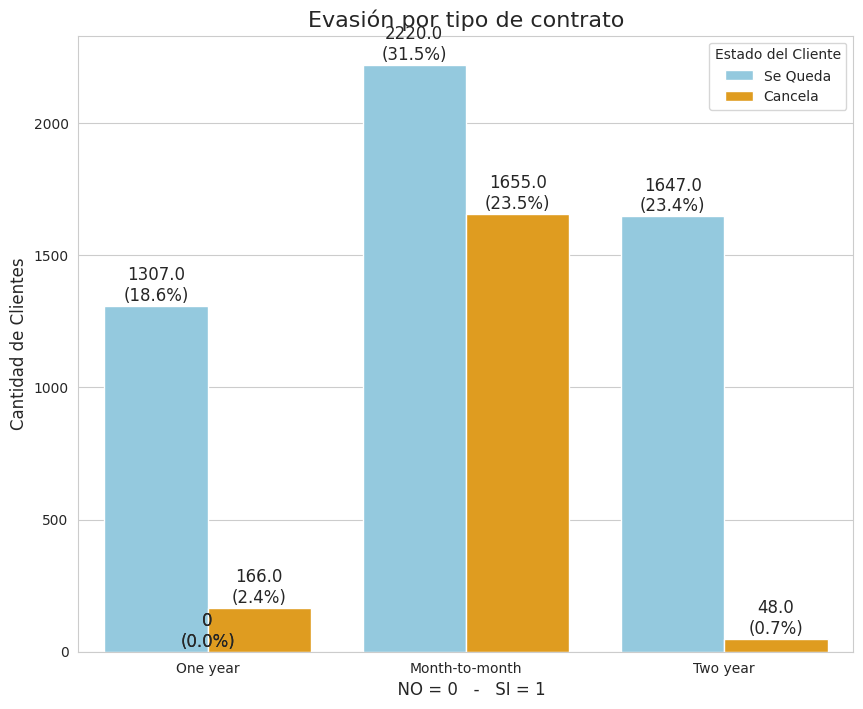

In [88]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='Tipo_Contrato', hue='Churn' ,data=df_data, palette=['Skyblue', 'Orange'])
ax.set_title('Evasión por tipo de contrato', fontsize=16)
ax.set_xlabel('''  NO = 0   -   SI = 1''', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)

legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Se Queda', 'Cancela'], title='Estado del Cliente')


total = len(df_data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 20,
            f'{height}\n({height/total:.1%})',
            ha="center",
            fontsize=12)

plt.show()

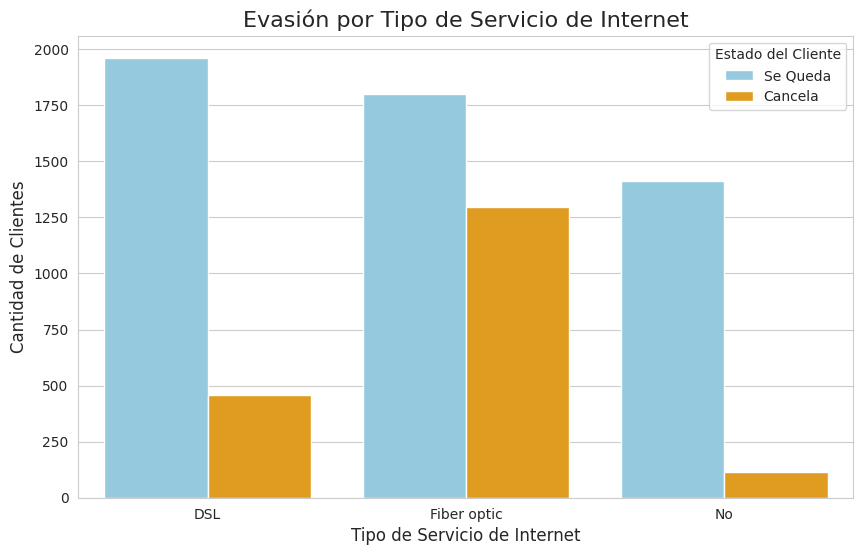

In [87]:
# Configuramos el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Creamos el countplot, usando 'Servicio_Internet' en el eje X y 'Churn' para el color (hue)
ax = sns.countplot(x='Servicio_Internet', hue='Churn', data=df_data, palette=['Skyblue', 'Orange'])

# Añadimos títulos y etiquetas
ax.set_title('Evasión por Tipo de Servicio de Internet', fontsize=16)
ax.set_xlabel('Tipo de Servicio de Internet', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)

# Renombramos la leyenda
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Se Queda', 'Cancela'], title='Estado del Cliente')

plt.show()

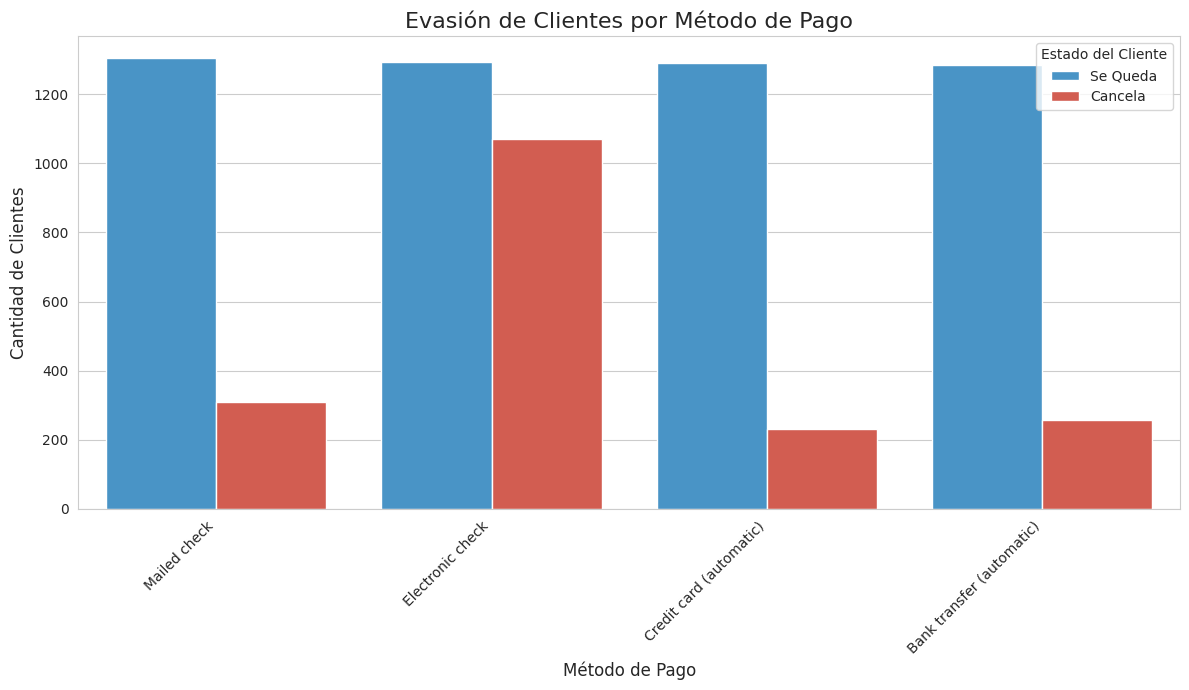

In [75]:
# Configuramos el tamaño del gráfico
plt.figure(figsize=(12, 7))

# Creamos el countplot.
# Nota: Las etiquetas del eje X son largas, así que las rotaremos para que no se superpongan.
ax = sns.countplot(x='Metodo_Pago', hue='Churn', data=df_data, palette=['#3498db', '#e74c3c'])

# Añadimos títulos y etiquetas
ax.set_title('Evasión por Método de Pago', fontsize=16)
ax.set_xlabel('Método de Pago', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)

# Rotamos las etiquetas del eje X para una mejor lectura
plt.xticks(rotation=45, ha='right')

# Renombramos la leyenda
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Se Queda', 'Cancela'], title='Estado del Cliente')

plt.tight_layout() # Ajusta el gráfico para que todo encaje bien
plt.show()

/tmp/ipython-input-91-3174431504.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Sin soporte', 'Con soporte'])


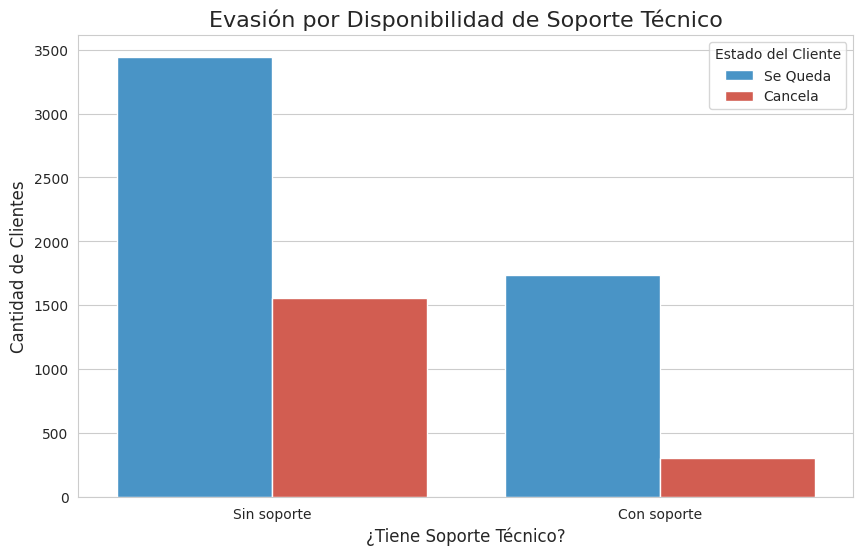

In [91]:
# Configuramos el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Creamos el countplot para 'Soporte_Tecnico'
ax = sns.countplot(x='Soporte_Tecnico', hue='Churn', data=df_data, palette=['#3498db', '#e74c3c'])

# Añadimos títulos y etiquetas
ax.set_title('Evasión por Disponibilidad de Soporte Técnico', fontsize=16)
ax.set_xlabel('¿Tiene Soporte Técnico?', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)

# Personalizamos las etiquetas del eje X para mayor claridad (0='No', 1='Sí')
ax.set_xticklabels(['Sin soporte', 'Con soporte'])

# Renombramos la leyenda
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Se Queda', 'Cancela'], title='Estado del Cliente')

plt.show()

/tmp/ipython-input-89-1887591898.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Churn', y='Factura_Mensual', data=df_data, palette=['#3498db', '#e74c3c'])


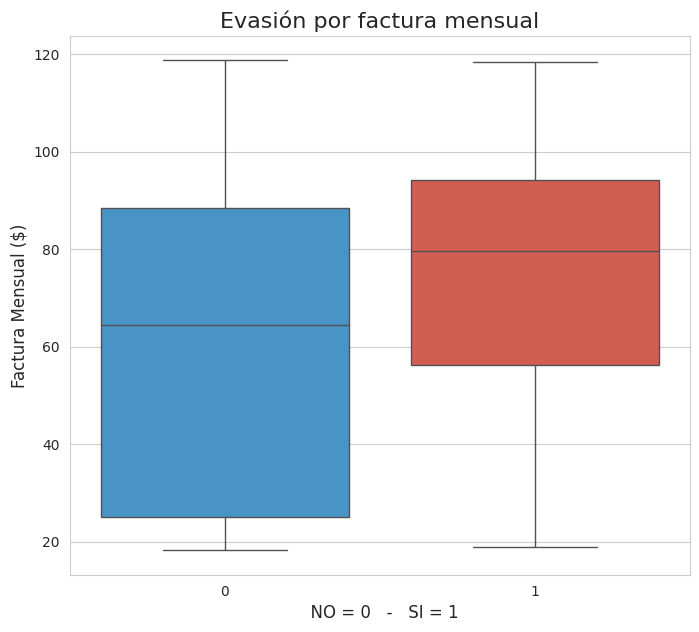

In [89]:
plt.figure(figsize=(8, 7))

# Creamos un boxplot para la Factura Mensual
ax = sns.boxplot(x='Churn', y='Factura_Mensual', data=df_data, palette=['#3498db', '#e74c3c'])

ax.set_title('Evasión por factura mensual', fontsize=16)
ax.set_xlabel('''  NO = 0   -   SI = 1''', fontsize=12)
ax.set_ylabel('Factura Mensual ($)', fontsize=12)

plt.show()

/tmp/ipython-input-90-2404200917.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Churn', y='Antiguedad_Meses', data=df_data, palette=['#3498db', '#e74c3c'])


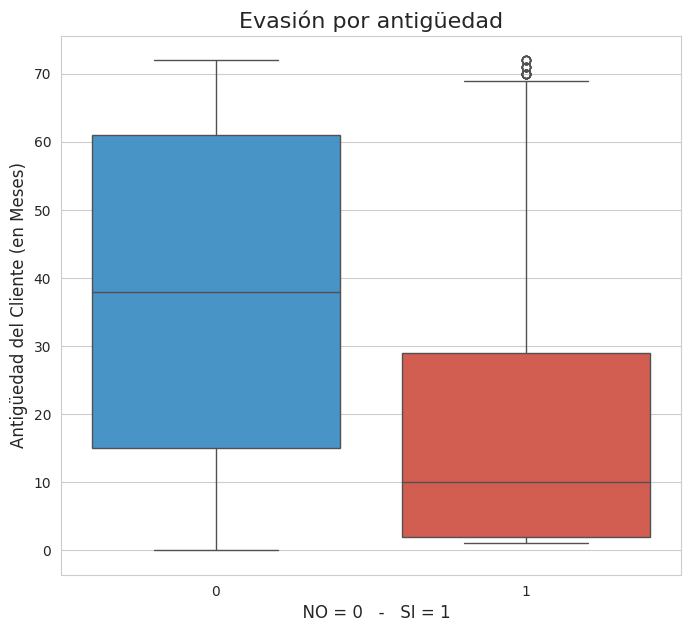

In [90]:
plt.figure(figsize=(8, 7))

# Creamos un boxplot para comparar la antigüedad entre los dos grupos de Churn
ax = sns.boxplot(x='Churn', y='Antiguedad_Meses', data=df_data, palette=['#3498db', '#e74c3c'])

# Títulos y etiquetas
ax.set_title('Evasión por antigüedad', fontsize=16)
ax.set_xlabel('''  NO = 0   -   SI = 1''', fontsize=12)
ax.set_ylabel('Antigüedad del Cliente (en Meses)', fontsize=12)

plt.show()

#📄Informe final



## Introducción

El siguiente análisis tiene como objetivo identificar los motivos clave que generan la evasión de clientes en la empresa Telecom X.

A través del analisis, se busca reconocer las caracteristicas o comportamientos que tienen los clientes que abandonan el servicio y compararlos con los que permanecen sin evasión con la finalidad de desarrollar estrategias de retención.  

---

## Limpieza y Tratamiento de Datos

Para garantizar asegurarnos de realizar un correcto análisis, se realizó el siguiente proceso de preparación de datos:

- **Carga y Exploración Inicial:**  
  Los datos, originalmente en formato JSON, se cargaron en un DataFrame de Pandas para su manipulación.

- **Corrección de Tipos de Datos:**  
  Se identificó que la columna `account.Charges.Total` estaba incorrectamente formateada como texto (`object`).  
  Se convirtió a tipo numérico, manejando 11 valores no numéricos correspondientes a clientes nuevos (antigüedad menor a 1 meses), cuyo total se asignó como `0.0`.

- **Manejo de Datos Inconsistentes:**  
  Se detectaron **224 filas** con la variable objetivo `Churn` vacía (`""`).  
  Al representar solo un 3% del total de los datos, se eliminaron para evitar sesgos en el análisis.

- **Normalizacion de Características:**  
  Se creó la columna `Factura_Diaria` a partir de `Factura_Mensual`, para obtener una unidad de medida de los gastos de los clientes normalizada en el tiempo.

- **Estandarización y Codificación:**
  - **Renombrado de Columnas:**  
    Se renombraron todas las columnas a encabezados más cortos e intuitivos  
    
  - **Codificación Numérica:**  
    Variables categóricas en texto fueron transformadas a formato numérico (ej. `"Yes"/"No"` a `1/0`).  
    También se unificaron valores como `"No internet service"` a `"No"`.

---

## Análisis Exploratorio de Datos

Tras la limpieza, se procedió a un análisis visual para identificar patrones y correlaciones con la evasión.  
- **Tasa general de Churn: 26.5%**

### Principales Factores de Evasión (Variables Categóricas)

- **Tipo de Contrato:**  
  Los clientes con contratos **Mes a mes** presentan una **tasa de evasión mucho mayor** que aquellos con contratos **anuales o de dos años**, quienes muestran alta lealtad.

- **Servicio de Internet:**  
  Clientes con **Fibra Óptica** tienen una **tasa de evasión mayor** que quienes usan **DSL**, lo que podría reflejar problemas de precio, calidad o expectativas.

- **Método de Pago:**  
  El uso de **Cheque electrónico** está fuertemente asociado con la **tasa de evasión más alta**, en contraste con pagos automáticos vía tarjeta de crédito o transferencia.

### Principales Factores de Evasión

- **Antigüedad del Cliente:**  
  La evasión se concentra en clientes **nuevos**.  
  - Mediana de **10 meses** para quienes se van.  
  - Mediana de **casi 40 meses** para quienes permanecen.

- **Factura Mensual:**  
  Clientes que cancelan tienen una **factura mensual más elevada** en comparación con quienes se quedan.

---

## Conclusiones

El análisis permite construir un **perfil de riesgo de evasión**. Este cliente cumple las siguientes caracteristicas:

- Tiene **baja antigüedad** (menos de 1 año).
- Posee un contrato **mes a mes**.
- Utiliza **Fibra Óptica**.
- Paga con **Cheque electrónico**.
- Recibe una **factura mensual elevada**.
- **No cuenta con servicio de Soporte Técnico**.

🔍 Estos factores **se combinan frecuentemente**, aumentando significativamente el riesgo de churn.

---

## Recomendaciones

Con base en la informacion obtenida, se proponen las siguientes estrategias:

1. **Fidelizar a Clientes Nuevos**  
   - Implementar un programa de incorporación durante los primeros **3 a 6 meses**.  
   - Asegurar buena experiencia inicial, resolución de dudas y percepción de valor.

2. **Incentivar Contratos a Largo Plazo**  
   - Crear campañas para migrar clientes de **mes a mes** a **contratos de 1 o 2 años**.  
   - Ofrecer descuentos o beneficios por compromiso.

3. **Auditar el Servicio de Fibra Óptica**  
   - Investigar causas de la alta evasión: precios, estabilidad, soporte técnico.  
   - Realizar mejoras en calidad o expectativas del servicio.

4. **Optimizar Métodos de Pago**  
   - Mejorar experiencia con **Cheque electrónico** o incentivar pagos automáticos.  
   - Ofrecer descuentos u otros beneficios por cambiar de método de pago.

5. **Promover Paquetes de Soporte Técnico**  
   - Ofrecer pack que incluya el soporte técnico desde los primeros meses.  
   - O incluirlo como **beneficio gratuito temporal** para aumentar retención.

